<a href="https://colab.research.google.com/github/mugobrian201/portfolio/blob/main/Housing_in_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHAT DRIVES REAL ESTATE PRICES IN MEXICO? A DATA-DRIVEN ANALYSIS


In [ ]:
# Install the kagglehub library
!pip install kagglehub

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# This makes your plots show up directly in the notebook
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

IMPORTING THE CSV FILES

In [ ]:
df = pd.read_csv("mexico-city-real-estate-1.csv")
print("Information :", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   4628 non-null   object 
 1   property_type               4628 non-null   object 
 2   place_with_parent_names     4628 non-null   object 
 3   lat-lon                     4144 non-null   object 
 4   price                       4538 non-null   float64
 5   currency                    4538 non-null   object 
 6   price_aprox_local_currency  4538 non-null   float64
 7   price_aprox_usd             4538 non-null   float64
 8   surface_total_in_m2         1668 non-null   float64
 9   surface_covered_in_m2       4436 non-null   float64
 10  price_usd_per_m2            1150 non-null   float64
 11  price_per_m2                4249 non-null   float64
 12  floor                       291 non-null    float64
 13  rooms                       136 n

DATA INSPECTION
Cleaning the DataFrame




In [ ]:
#df1 inspection
print(df.shape)
print(df.info())
print(df.head())

(4628, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   4628 non-null   object 
 1   property_type               4628 non-null   object 
 2   place_with_parent_names     4628 non-null   object 
 3   lat-lon                     4144 non-null   object 
 4   price                       4538 non-null   float64
 5   currency                    4538 non-null   object 
 6   price_aprox_local_currency  4538 non-null   float64
 7   price_aprox_usd             4538 non-null   float64
 8   surface_total_in_m2         1668 non-null   float64
 9   surface_covered_in_m2       4436 non-null   float64
 10  price_usd_per_m2            1150 non-null   float64
 11  price_per_m2                4249 non-null   float64
 12  floor                       291 non-null    float64
 13  rooms                 

In [ ]:
#Drop Columns that are irrevelant and have too many missing values, that will not be useful for my goal
df.drop(columns=['expenses', 'rooms', 'floor', 'price_usd_per_m2', 'currency'], inplace=True)

In [ ]:
#Drop NaN Values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 4 to 4625
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1103 non-null   object 
 1   property_type               1103 non-null   object 
 2   place_with_parent_names     1103 non-null   object 
 3   lat-lon                     1103 non-null   object 
 4   price                       1103 non-null   float64
 5   price_aprox_local_currency  1103 non-null   float64
 6   price_aprox_usd             1103 non-null   float64
 7   surface_total_in_m2         1103 non-null   float64
 8   surface_covered_in_m2       1103 non-null   float64
 9   price_per_m2                1103 non-null   float64
 10  properati_url               1103 non-null   object 
dtypes: float64(6), object(5)
memory usage: 103.4+ KB


In [ ]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,properati_url
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,16457437.50,875000.00,0.0,263.0,3326.996198,http://cancun.properati.com.mx/hg4t_venta_depa...
12,sell,apartment,|Solidaridad|Quintana Roo|México|,"20.4987828982,-87.2228193283",300000.0,5642550.00,300000.00,1500.0,160.0,1875.000000,http://playa-del-carmen.properati.com.mx/esmj_...
13,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.3794059,-99.1591446",3272300.0,3243466.76,172446.86,0.0,83.0,39425.301200,http://benito-juarez.properati.com.mx/qc0v_ven...
15,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.0511211635,-86.7828512192",115000.0,2162977.50,115000.00,49.0,49.0,2346.938776,http://cancun.properati.com.mx/jh5k_venta_depa...
20,sell,apartment,|Iztacalco|Distrito Federal|México|,"19.4024128,-99.0953907",1345000.0,1333148.73,70880.12,56.0,56.0,24017.857140,http://iztacalco.properati.com.mx/r6gm_venta_d...




1.   There is a single "lat-lon" columns, they need to be separate, one for lat, the other for lon
2.   Instead of "state" column, there is "place with parent names" with district,state and country. We need to split and get state column only.



In [ ]:
#Separate 'lat-lon' columns
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True)

In [ ]:
#Separate 'place_with_parent_names' column
df["State"] = df["place_with_parent_names"].str.split("|", expand=True)[2]

In [ ]:
#Drop "place_with_parent_names" and "lat-lon" columns
df.drop(columns = ["place_with_parent_names", "lat-lon"], inplace = True)

After Cleaning, time to save the clean CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save your cleaned DataFrame to Google Drive
df.to_csv('/content/drive/MyDrive/cleaned_property_data.csv', index=False)
print("File saved successfully to Google Drive!")

File saved successfully to Google Drive!


In [ ]:
df.head()

,operation,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,properati_url,lat,lon,State
4,sell,apartment,875000.0,16457437.50,875000.00,0.0,263.0,3326.996198,http://cancun.properati.com.mx/hg4t_venta_depa...,21.1902642,-86.8198375,Quintana Roo
12,sell,apartment,300000.0,5642550.00,300000.00,1500.0,160.0,1875.000000,http://playa-del-carmen.properati.com.mx/esmj_...,20.4987828982,-87.2228193283,Quintana Roo
13,sell,apartment,3272300.0,3243466.76,172446.86,0.0,83.0,39425.301200,http://benito-juarez.properati.com.mx/qc0v_ven...,19.3794059,-99.1591446,Distrito Federal
15,sell,apartment,115000.0,2162977.50,115000.00,49.0,49.0,2346.938776,http://cancun.properati.com.mx/jh5k_venta_depa...,21.0511211635,-86.7828512192,Quintana Roo
20,sell,apartment,1345000.0,1333148.73,70880.12,56.0,56.0,24017.857140,http://iztacalco.properati.com.mx/r6gm_venta_d...,19.4024128,-99.0953907,Distrito Federal


EXPLORATORY DATA ANALYSIS

Location Data : Using "lat" and "lon" columns. Visualizations using Scatter Plot, which is useful for representing data between two numerical variables

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat = "lat",
    lon = "lon",
    center = {"lat": 19.43, "lon": -99.13}, #Map will be centered on Mexico City
    width = 600,
    height = 600,
    hover_data=["price_aprox_usd"]
    )
fig.update_layout(mapbox_style = "open-street-map")
fig.show()

Categorical Data : "State"

In [ ]:
print(df["State"].unique())
print(df["State"].value_counts())

['Quintana Roo' 'Distrito Federal' 'Solidaridad' 'Benito Juárez'
 'Zacatecas']
State
Distrito Federal    639
Quintana Roo        439
Solidaridad          19
Benito Juárez         3
Zacatecas             3
Name: count, dtype: int64


Numerical Data : "surface_covered_in_m2" and "price_aprox_usd"

In [ ]:
df[["surface_covered_in_m2", "price_aprox_usd"]].describe()

,surface_covered_in_m2,price_aprox_usd
count,1103.000000,1.103000e+03
mean,246.056210,4.824053e+05
std,276.626972,9.615101e+05
min,1.000000,7.823940e+03
25%,93.000000,1.240223e+05
50%,173.000000,2.400923e+05
75%,300.000000,4.727362e+05
max,4500.000000,2.008064e+07


Note for "surface_covered_in_m2" that Median(172m2) < Mean(246m2)

Distribution of House sizes; using a Histogram and Boxplot for a better understanding

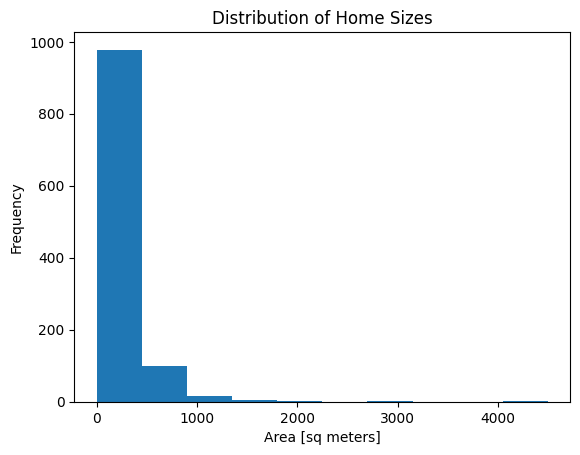

In [ ]:
#Histogram for "surface_covered_in_m2"
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

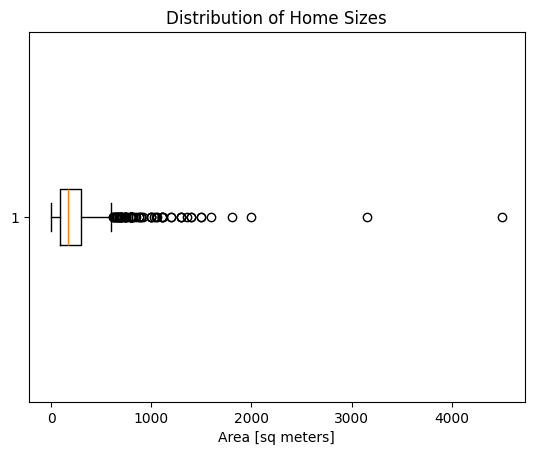

In [ ]:
#Boxplot of area_m2
plt.boxplot(df["surface_covered_in_m2"], vert = False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

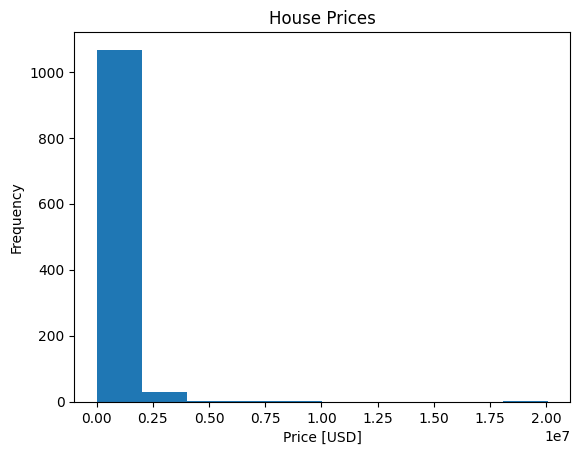

In [ ]:
#Hist for "price_aprox_usd"
plt.hist(df["price_aprox_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("House Prices");


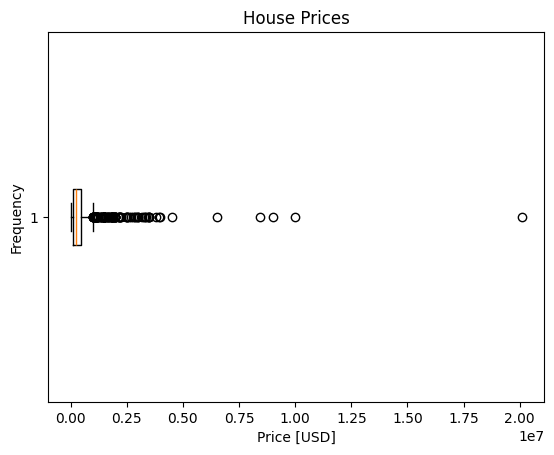

In [ ]:
#Boxplot for "price_aprox_usd"
plt.boxplot(df["price_aprox_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("House Prices");

Interpretation of the above Diagrams


The Histogram of area_m2 shows a right skewed distribution where many houses are between (93-300)m2 which is quite reasonable for most houses/apartments.
mean ($482K) > median ($240K) also shows a right skewed distribution. There are also extremely affordable and ultra-luxury properties in the same dataset, where most of the home owners have 'typical' properties that are actually affordable.
The Max Values in the Dataset are extreme outliers hence making the visualizations more rightly skewed, may affect the dataset and will influence correlation and regression results.



Location or Size : What influence house price in Mexico?
1. Which state has the most expensive real estate market?

State
Distrito Federal    499763.060423
Quintana Roo        465188.271777
Solidaridad         411840.112632
Benito Juárez       163232.093333
Zacatecas            70719.376667
Name: price_aprox_usd, dtype: float64


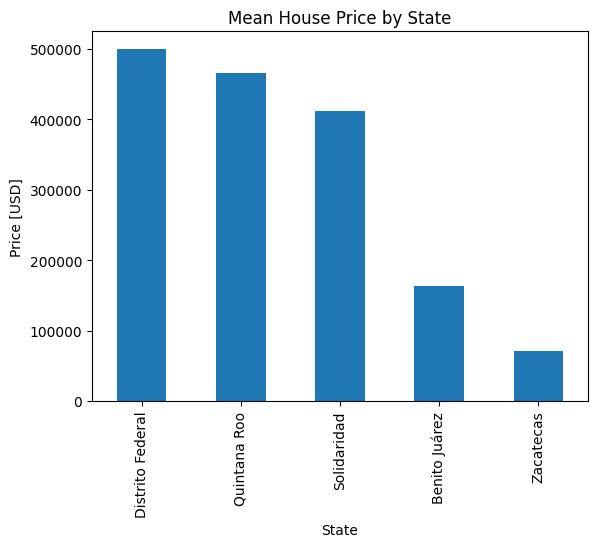

In [ ]:
mean_price_by_state = df.groupby("State")["price_aprox_usd"].mean().sort_values(ascending=False)
print(mean_price_by_state)
#Plot a bar chart
mean_price_by_state.plot(
    kind = "bar",
    xlabel = "State",
    ylabel="Price [USD]",
    title="Mean House Price by State"
);

create a column of price_aprox_usd / surface_covered_in_m2

In [ ]:
df["price_aprox_per_m2"] = df["price_aprox_usd"] / df["surface_covered_in_m2"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 4 to 4625
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1103 non-null   object 
 1   property_type               1103 non-null   object 
 2   price                       1103 non-null   float64
 3   price_aprox_local_currency  1103 non-null   float64
 4   price_aprox_usd             1103 non-null   float64
 5   surface_total_in_m2         1103 non-null   float64
 6   surface_covered_in_m2       1103 non-null   float64
 7   price_per_m2                1103 non-null   float64
 8   properati_url               1103 non-null   object 
 9   lat                         1103 non-null   object 
 10  lon                         1103 non-null   object 
 11  State                       1103 non-null   object 
 12  price_aprox_per_m2          1103 non-null   float64
dtypes: float64(7), object(6)
memory usage:

State
Quintana Roo        3315.619567
Solidaridad         2796.303053
Distrito Federal    1920.889497
Benito Juárez       1081.221894
Zacatecas            686.398393
Name: price_aprox_per_m2, dtype: float64


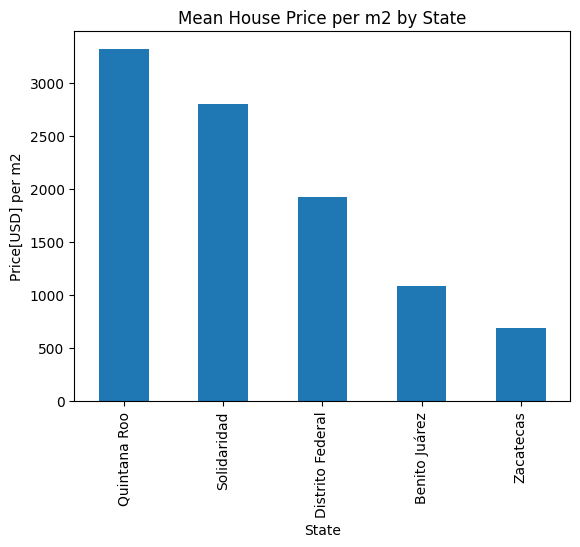

In [ ]:
mean_aprox_price_per_m2_by_state = df.groupby("State")["price_aprox_per_m2"].mean().sort_values(ascending=False)
print(mean_aprox_price_per_m2_by_state)
#Plot a bar chart
mean_aprox_price_per_m2_by_state.plot(
    kind = "bar",
    xlabel = "State",
    ylabel="Price[USD] per m2",
    title="Mean House Price per m2 by State"
);

Interpretation:
Chart 2 (Price per m²) is MUCH better and more meaningful because     Total Price tells you how much money people are spending overall, while Price per m² tells you how much value the market assigns to each unit of space

Is there a Realtionship between Home Size and Price? We already know that Location of a home affects its price

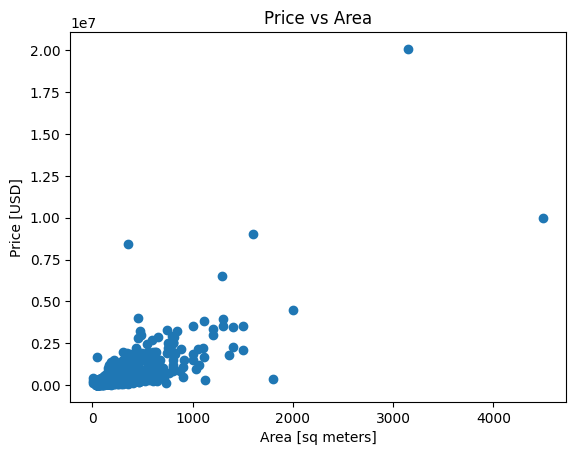

In [ ]:
#Scatter plot for price vs area
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

As size increases price goes up(positive correlation) but the relationship is weak.

In [ ]:
# 1. Log transformations to handle skewness
df['log_price'] = np.log(df['price_aprox_usd'])
df['log_size'] = np.log(df['surface_covered_in_m2'])

# 2. Check for correlation on transformed data
correlation = df[['log_price', 'log_size', 'lat', 'lon']].corr()
print(correlation)

           log_price  log_size       lat       lon
log_price   1.000000  0.728495  0.023224  0.030920
log_size    0.728495  1.000000  0.118256  0.099281
lat         0.023224  0.118256  1.000000  0.939691
lon         0.030920  0.099281  0.939691  1.000000


log_size vs log_price: 0.728
Strong Positive Correlation
Interpretation: Property size explains most of the variation in price. As size increases, price increases substantially.
This is my most important relationship!

lat vs log_price: 0.023
lon vs log_price: 0.031
These are VERY WEAK correlations (almost zero)
Interpretation: Geographic coordinates alone explain almost nothing about price variations
This suggests that being at a specific latitude/longitude doesn't directly determine price

lat vs log_size: 0.118
lon vs log_size: 0.099
Weak positive correlations
Interpretation: Larger properties tend to be located in slightly specific areas, but the relationship isn't strong

🎯 Final Conclusion

Property size is the dominant factor influencing sale prices, explaining significantly more variation than geographic location.